In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats

from matplotlib import colors
from utils import open_json

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute()

path_dif = os.path.join(PATH_ROOT, "results", "differencing_denoise_results.csv")

path_avg = os.path.join(PATH_ROOT, "results", "averaged_denoise_results.csv")

path_per = os.path.join(PATH_ROOT, "results", "percentage_denoise_results.csv")

path_nor = os.path.join(PATH_ROOT, "results", "normal_denoise_results.csv")

RESULT_COLUMNS = ["Date", "Seed", "MSE Control", "MSE Experiment", "Experiment Group Index", "Control Group Index",
                "Use Differencing", "Use Averaging", "Use Percentage Change", "Scaler Type", "Moving Average Window Size", 
                "Moving Average Direction", "Success Count", "Event Count", "Success Rate", "Slopes", "Empty"]

In [3]:
df_dif = pd.read_csv(path_dif)
df_avg = pd.read_csv(path_avg)
#df_per = pd.read_csv(path_per)
df_nor = pd.read_csv(path_nor)

df_dif.columns = RESULT_COLUMNS
df_avg.columns = RESULT_COLUMNS
#df_per.columns = RESULT_COLUMNS
df_nor.columns = RESULT_COLUMNS

In [4]:
#df_per = df_per.astype({'##plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)_averge_num': 'object'})
df = pd.concat([df_dif, df_avg, df_nor])
df = df_nor
#df['help_column'] = df.groupby('date')['success_rate'].transform('max')

In [5]:
def update_ma_type(df):
    
    conditions = [
        (df['Moving Average Direction'] == "center") & (df['Moving Average Window Size'] != 0),
        (df['Moving Average Direction'] == "before") & (df['Moving Average Window Size'] != 0),
        (df['Moving Average Direction'] == "after") & (df['Moving Average Window Size'] != 0),
        df['Moving Average Window Size'] == 0,
        #(df['Moving Average Direction'] == "after") & (df['Moving Average Window Size'] == 30),
        ]

    #values = ["Centered Moving Average", "Simple Moving Average", "Cumulative Moving Average"]
    values = ["Centered", "Simple", "Cumulative", "No"]
    # values = ["Centered", "Simple", "Cumulative", "0"] # Uncomment this line for creating table result
    # values = ["Centered", "Simple", "Cumulative", "No". "Removed Cumulative"]
    df['Moving Average Type'] = np.select(conditions, values)  

    return df

In [6]:
def update_dates(df):
    
    conditions = [
        df['Date'] == "April_8",
        df['Date'] == "April_9",
        df['Date'] == "April_10",
        ]

    values = [-8,-9,-10]
    df['Date'] = np.select(conditions, values)  

    return df

In [7]:
def update_dates_for_plot(df):
    
    conditions = [
        df['Date'] == "April_8",
        df['Date'] == "April_9",
        df['Date'] == "April_10",
        ]

    values = ["Day 1", "Day 2", "Day 3"]
    df['Date'] = np.select(conditions, values)  

    return df

In [8]:
df = update_ma_type(df)
#df = update_dates(df) # Comment this line for creating table result
df = update_dates_for_plot(df) # Unomment this line for creating table result
df = df.drop(columns=['Moving Average Direction'])

In [9]:
df.dtypes

Date                           object
Seed                            int64
MSE Control                   float64
MSE Experiment                float64
Experiment Group Index          int64
Control Group Index             int64
Use Differencing                 bool
Use Averaging                    bool
Use Percentage Change            bool
Scaler Type                    object
Moving Average Window Size      int64
Success Count                   int64
Event Count                     int64
Success Rate                  float64
Slopes                         object
Empty                         float64
Moving Average Type            object
dtype: object

In [10]:
def generate_latex_table(headers, data):
    textabular = f"l|{'r'*len(headers)}"
    texheader = " & " + " & ".join(headers) + "\\\\"
    texdata = "\\hline\n"
    for label in data:
        if label == "z":
            texdata += "\\hline\n"
        texdata += f"{label} & {' & '.join(map(str,data[label]))} \\\\\n"

    print("\\begin{tabular}{"+textabular+"}")
    print(texheader)
    print(texdata,end="")
    print("\\end{tabular}")

In [11]:
r_header = ["Date","Scaler Type","Moving Average Type","Sucess Rate"]

In [12]:
r_avg = df[df["Use Averaging"] == True].groupby(['Date', 'Scaler Type', "Moving Average Type"])[['Success Rate']].max()

In [13]:
r_avg 
#print(r_avg.to_latex())

,,,Success Rate
Date,Scaler Type,Moving Average Type,


In [14]:
r_dif = df[df["Use Differencing"] == True].groupby(['Date', 'Scaler Type', "Moving Average Type"])[['Success Rate']].mean()

In [15]:
r_dif
print(r_dif.to_latex())

\begin{tabular}{lllr}
\toprule
\bottomrule
\end{tabular}



C:\Users\markc\AppData\Local\Temp\ipykernel_46816\3862253856.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(r_dif.to_latex())


In [16]:
df_not_diff = df[df["Use Differencing"] == False]
df_nor = df_not_diff[df_not_diff["Use Averaging"] ==False]

In [17]:
r_nor = df_nor.groupby(['Date', 'Scaler Type', "Moving Average Type"])[['Success Rate']].max()

In [18]:
r_nor
#print(r_nor.to_latex())

Success Rate
Date  Scaler Type Moving Average Type              
Day 1 MinMax      Centered                 0.679245
                  Cumulative               0.679245
                  No                       0.509434
                  Simple                   0.660377
      Standard    Centered                 0.698113
                  Cumulative               0.679245
                  No                       0.528302
                  Simple                   0.716981
Day 2 MinMax      Centered                 0.608696
                  Cumulative               0.739130
                  No                       0.565217
                  Simple                   0.652174
      Standard    Centered                 0.652174
                  Cumulative               0.695652
                  No                       0.521739
                  Simple                   0.652174
Day 3 MinMax      Centered                 0.750000
                  Cumulative               0.916667
                  No                       0.750000
                  Simple                   0.666667
      Standard    Centered                 0.666667
                  Cumulative               0.750000
                  No                       0.416667
                  Simple                   0.583333

In [19]:
all_max = df.groupby(['Date', 'Scaler Type', "Moving Average Type", "Use Averaging", "Use Differencing"])[['Success Rate']].max()
all_max

Success Rate
Date  Scaler Type Moving Average Type Use Averaging Use Differencing              
Day 1 MinMax      Centered            False         False                 0.679245
                  Cumulative          False         False                 0.679245
                  No                  False         False                 0.509434
                  Simple              False         False                 0.660377
      Standard    Centered            False         False                 0.698113
                  Cumulative          False         False                 0.679245
                  No                  False         False                 0.528302
                  Simple              False         False                 0.716981
Day 2 MinMax      Centered            False         False                 0.608696
                  Cumulative          False         False                 0.739130
                  No                  False         False                 0.565217
                  Simple              False         False                 0.652174
      Standard    Centered            False         False                 0.652174
                  Cumulative          False         False                 0.695652
                  No                  False         False                 0.521739
                  Simple              False         False                 0.652174
Day 3 MinMax      Centered            False         False                 0.750000
                  Cumulative          False         False                 0.916667
                  No                  False         False                 0.750000
                  Simple              False         False                 0.666667
      Standard    Centered            False         False                 0.666667
                  Cumulative          False         False                 0.750000
                  No                  False         False                 0.416667
                  Simple              False         False                 0.583333

In [20]:
print(all_max.to_latex())

\begin{tabular}{lllllr}
\toprule
      &          &        &       &       &  Success Rate \\
Date & Scaler Type & Moving Average Type & Use Averaging & Use Differencing &               \\
\midrule
Day 1 & MinMax & Centered & False & False &      0.679245 \\
      &          & Cumulative & False & False &      0.679245 \\
      &          & No & False & False &      0.509434 \\
      &          & Simple & False & False &      0.660377 \\
      & Standard & Centered & False & False &      0.698113 \\
      &          & Cumulative & False & False &      0.679245 \\
      &          & No & False & False &      0.528302 \\
      &          & Simple & False & False &      0.716981 \\
Day 2 & MinMax & Centered & False & False &      0.608696 \\
      &          & Cumulative & False & False &      0.739130 \\
      &          & No & False & False &      0.565217 \\
      &          & Simple & False & False &      0.652174 \\
      & Standard & Centered & False & False &      0.652174 \\
     

C:\Users\markc\AppData\Local\Temp\ipykernel_46816\3147027997.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_max.to_latex())


In [21]:
nor_max = df_nor.groupby(['Date', 'Scaler Type', "Moving Average Type"])[['Success Rate']].max()
nor_max

Success Rate
Date  Scaler Type Moving Average Type              
Day 1 MinMax      Centered                 0.679245
                  Cumulative               0.679245
                  No                       0.509434
                  Simple                   0.660377
      Standard    Centered                 0.698113
                  Cumulative               0.679245
                  No                       0.528302
                  Simple                   0.716981
Day 2 MinMax      Centered                 0.608696
                  Cumulative               0.739130
                  No                       0.565217
                  Simple                   0.652174
      Standard    Centered                 0.652174
                  Cumulative               0.695652
                  No                       0.521739
                  Simple                   0.652174
Day 3 MinMax      Centered                 0.750000
                  Cumulative               0.916667
                  No                       0.750000
                  Simple                   0.666667
      Standard    Centered                 0.666667
                  Cumulative               0.750000
                  No                       0.416667
                  Simple                   0.583333

In [22]:
nor_mean = df_nor.groupby(['Date', 'Scaler Type', "Moving Average Type"])[['Success Rate']].mean()
nor_mean

Success Rate
Date  Scaler Type Moving Average Type              
Day 1 MinMax      Centered                 0.552561
                  Cumulative               0.595687
                  No                       0.509434
                  Simple                   0.533693
      Standard    Centered                 0.584906
                  Cumulative               0.576819
                  No                       0.528302
                  Simple                   0.584906
Day 2 MinMax      Centered                 0.503106
                  Cumulative               0.627329
                  No                       0.565217
                  Simple                   0.521739
      Standard    Centered                 0.552795
                  Cumulative               0.577640
                  No                       0.521739
                  Simple                   0.521739
Day 3 MinMax      Centered                 0.666667
                  Cumulative               0.854167
                  No                       0.750000
                  Simple                   0.607143
      Standard    Centered                 0.488095
                  Cumulative               0.535714
                  No                       0.416667
                  Simple                   0.464286

In [23]:
nor_max_mean = pd.concat([nor_max, nor_mean], axis = 1)
nor_max_mean

Success Rate  Success Rate
Date  Scaler Type Moving Average Type                            
Day 1 MinMax      Centered                 0.679245      0.552561
                  Cumulative               0.679245      0.595687
                  No                       0.509434      0.509434
                  Simple                   0.660377      0.533693
      Standard    Centered                 0.698113      0.584906
                  Cumulative               0.679245      0.576819
                  No                       0.528302      0.528302
                  Simple                   0.716981      0.584906
Day 2 MinMax      Centered                 0.608696      0.503106
                  Cumulative               0.739130      0.627329
                  No                       0.565217      0.565217
                  Simple                   0.652174      0.521739
      Standard    Centered                 0.652174      0.552795
                  Cumulative               0.695652      0.577640
                  No                       0.521739      0.521739
                  Simple                   0.652174      0.521739
Day 3 MinMax      Centered                 0.750000      0.666667
                  Cumulative               0.916667      0.854167
                  No                       0.750000      0.750000
                  Simple                   0.666667      0.607143
      Standard    Centered                 0.666667      0.488095
                  Cumulative               0.750000      0.535714
                  No                       0.416667      0.416667
                  Simple                   0.583333      0.464286

In [24]:
#nor_max_mean.to_csv("nor_result.csv", float_format="%.4f")
print(nor_max_mean.to_latex(float_format="%.4f"))

\begin{tabular}{lllrr}
\toprule
      &          &        &  Success Rate &  Success Rate \\
Date & Scaler Type & Moving Average Type &               &               \\
\midrule
Day 1 & MinMax & Centered &        0.6792 &        0.5526 \\
      &          & Cumulative &        0.6792 &        0.5957 \\
      &          & No &        0.5094 &        0.5094 \\
      &          & Simple &        0.6604 &        0.5337 \\
      & Standard & Centered &        0.6981 &        0.5849 \\
      &          & Cumulative &        0.6792 &        0.5768 \\
      &          & No &        0.5283 &        0.5283 \\
      &          & Simple &        0.7170 &        0.5849 \\
Day 2 & MinMax & Centered &        0.6087 &        0.5031 \\
      &          & Cumulative &        0.7391 &        0.6273 \\
      &          & No &        0.5652 &        0.5652 \\
      &          & Simple &        0.6522 &        0.5217 \\
      & Standard & Centered &        0.6522 &        0.5528 \\
      &          & Cumula

C:\Users\markc\AppData\Local\Temp\ipykernel_46816\1212741499.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(nor_max_mean.to_latex(float_format="%.4f"))


In [25]:
#df.groupby(['Date', 'Scaler Type', "Moving Average Direction", "Use Averaging", "Use Percentage Change"])[['Success Rate']].mean()
df.groupby(['Date', 'Scaler Type', "Moving Average Type", ])[['Success Rate']].mean()

Success Rate
Date  Scaler Type Moving Average Type              
Day 1 MinMax      Centered                 0.552561
                  Cumulative               0.595687
                  No                       0.509434
                  Simple                   0.533693
      Standard    Centered                 0.584906
                  Cumulative               0.576819
                  No                       0.528302
                  Simple                   0.584906
Day 2 MinMax      Centered                 0.503106
                  Cumulative               0.627329
                  No                       0.565217
                  Simple                   0.521739
      Standard    Centered                 0.552795
                  Cumulative               0.577640
                  No                       0.521739
                  Simple                   0.521739
Day 3 MinMax      Centered                 0.666667
                  Cumulative               0.854167
                  No                       0.750000
                  Simple                   0.607143
      Standard    Centered                 0.488095
                  Cumulative               0.535714
                  No                       0.416667
                  Simple                   0.464286

In [26]:
df.groupby(['Date', 'Scaler Type', "Moving Average Type", "Use Averaging", "Moving Average Window Size"])[['Success Rate']].mean()

Success Rate
Date  Scaler Type Moving Average Type Use Averaging Moving Average Window Size              
Day 1 MinMax      Centered            False         30                              0.528302
                                                    60                              0.584906
                                                    120                             0.528302
                                                    240                             0.471698
                                                    300                             0.471698
...                                                                                      ...
Day 3 Standard    Simple              False         120                             0.583333
                                                    240                             0.500000
                                                    300                             0.416667
                                                    600                             0.583333
                                                    900                             0.500000

[132 rows x 1 columns]

In [27]:
#df_result = df.groupby(['date', 'scaler_type', "moving_average_direction", "moving_averge_num"])[['success_rate']].max()

In [28]:
#g = sns.barplot(palette=cdict, order=order_nont_anns, data=df_nont_anns, x="Attack Name", y="Attacked AE", ax=ax[0])
##g = sns.barplot(data=df, x="Date", y="MSE Control",hue="Scaler Type")
#g.set_xlabel("")
#g.set_ylabel("")
#g.set_xticklabels(g.get_xticklabels(), rotation = 320, ha="left", rotation_mode="anchor")
#g.set_title("MAE (↑)")

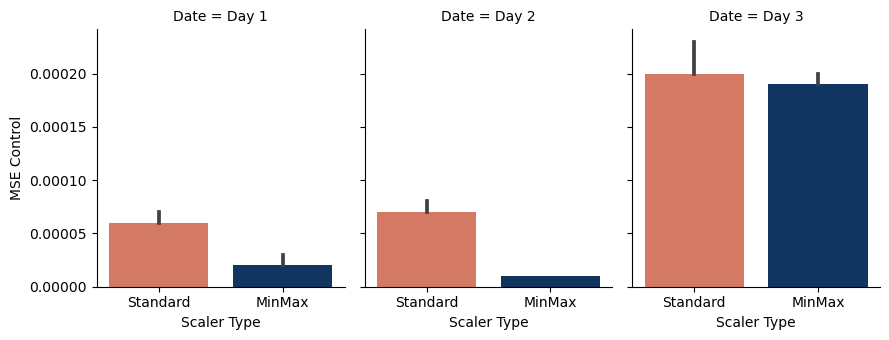

In [29]:
scaler_type_cdict = {"Standard": "#E76F51","MinMax": "#03346E"}

catplot_height = 3.5
catplot_aspect = 3/catplot_height
g = sns.catplot(palette=scaler_type_cdict, kind="bar",
                data=df, x = "Scaler Type", y="MSE Control", col="Date", height=catplot_height, aspect=catplot_aspect, estimator="min")
#g.set_xticklabels(rotation=-45)
#g.set_ylabels("Detection Rate")
#g.set_xlabels(" ")
#g.set_titles(template='Attack Epsilon (Unseen) = {col_name}')
#plt.ylim(0, 1.05)
plt.savefig("plots\mse_control_by_scaler_type.pdf", bbox_inches="tight")

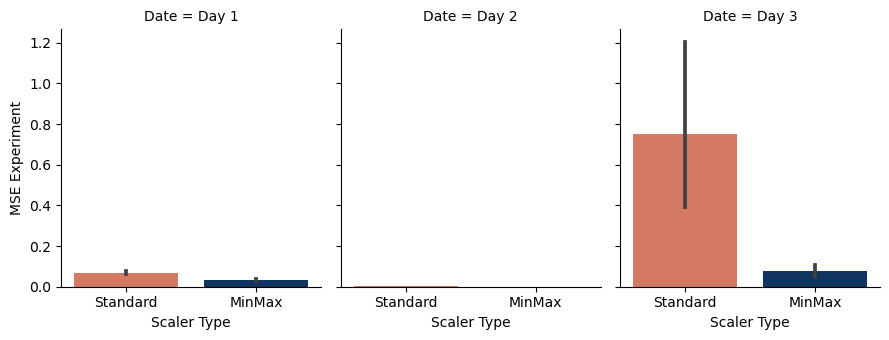

In [30]:
catplot_height = 3.5
catplot_aspect = 3/catplot_height
g = sns.catplot(palette=scaler_type_cdict, kind="bar",
                data=df, x = "Scaler Type", y="MSE Experiment", col="Date", height=catplot_height, aspect=catplot_aspect,)
#g.set_xticklabels(rotation=-45)
#g.set_ylabels("Detection Rate")
#g.set_xlabels(" ")
#g.set_titles(template='Attack Epsilon (Unseen) = {col_name}')
#plt.ylim(0, 1.05)
plt.savefig("plots\mse_exp_by_scaler_type.pdf", bbox_inches="tight")

In [31]:
df[df["Moving Average Type"] == "No"]

,Date,Seed,MSE Control,MSE Experiment,Experiment Group Index,Control Group Index,Use Differencing,Use Averaging,Use Percentage Change,Scaler Type,Moving Average Window Size,Success Count,Event Count,Success Rate,Slopes,Empty,Moving Average Type
0,Day 1,12345,0.00012,0.08637,0,2,False,False,False,Standard,0,28,53,0.528302,[0.00026366931360386376; -0.0003904348655854; ...,NaN,No
8,Day 1,12345,0.00012,0.08637,0,2,False,False,False,Standard,0,28,53,0.528302,[0.00026366931360386376; -0.0003904348655854; ...,NaN,No
16,Day 1,12345,0.00012,0.08637,0,2,False,False,False,Standard,0,28,53,0.528302,[0.00026366931360386376; -0.0003904348655854; ...,NaN,No
24,Day 1,12345,0.00003,0.04647,0,2,False,False,False,MinMax,0,27,53,0.509434,[8.227845897210674e-05; -6.40749205066184e-05;...,NaN,No
32,Day 1,12345,0.00003,0.04647,0,2,False,False,False,MinMax,0,27,53,0.509434,[8.227845897210674e-05; -6.40749205066184e-05;...,NaN,No
40,Day 1,12345,0.00003,0.04647,0,2,False,False,False,MinMax,0,27,53,0.509434,[8.227845897210674e-05; -6.40749205066184e-05;...,NaN,No
48,Day 2,12345,0.00009,0.00404,1,2,False,False,False,Standard,0,12,23,0.521739,[-2.831955158943861e-05; -5.8770253119077456e-...,NaN,No
56,Day 2,12345,0.00009,0.00404,1,2,False,False,False,Standard,0,12,23,0.521739,[-2.831955158943861e-05; -5.8770253119077456e-...,NaN,No
64,Day 2,12345,0.00009,0.00404,1,2,False,False,False,Standard,0,12,23,0.521739,[-2.831955158943861e-05; -5.8770253119077456e-...,NaN,No
72,Day 2,12345,0.00001,0.00040,1,2,False,False,False,MinMax,0,13,23,0.565217,[6.099177368415835e-06; 2.1802503768059414e-06...,NaN,No


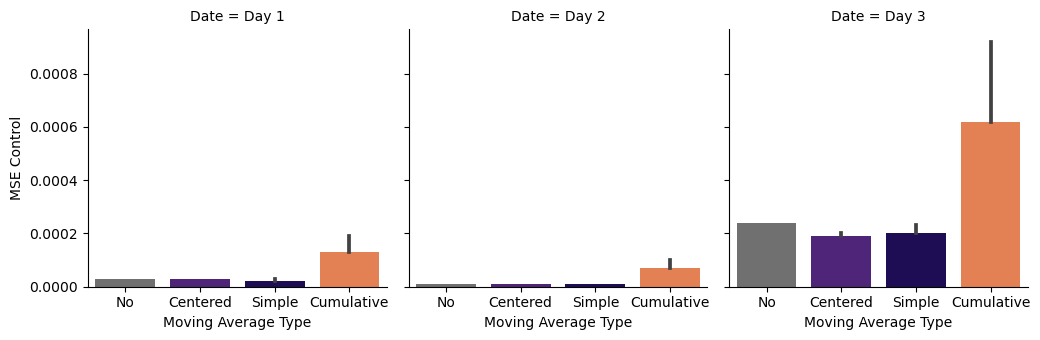

In [32]:
catplot_height = 3.5
catplot_aspect = 3.5/catplot_height

ma_type_cdict = {"Centered": "#4F1787","Simple": "#180161", "Cumulative":"#FB773C", "No": "#707070"}
g = sns.catplot(palette=ma_type_cdict, kind="bar",
                data=df, x = "Moving Average Type", y="MSE Control", col="Date", height=catplot_height, aspect=catplot_aspect, estimator="min")
#g.set_xticklabels(rotation=-45)
#g.set_ylabels("Detection Rate")
#g.set_xlabels(" ")
#g.set_titles(template='Attack Epsilon (Unseen) = {col_name}')
#plt.ylim(0, 1.05)
plt.savefig("plots\mse_control_by_ma_type.pdf", bbox_inches="tight")

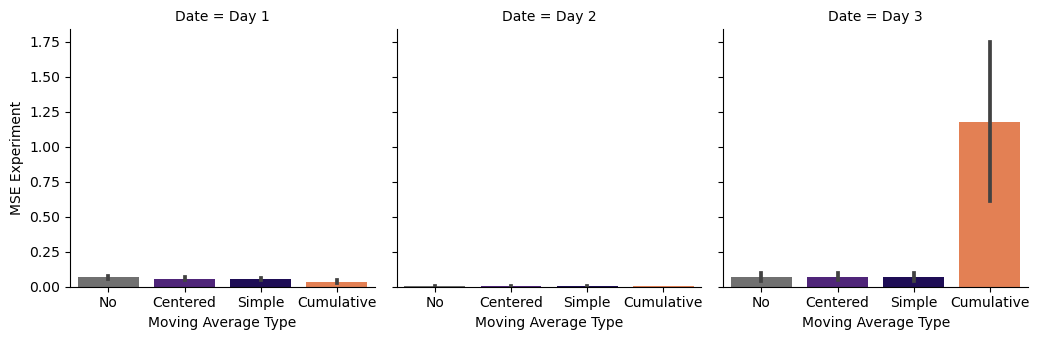

In [33]:
catplot_height = 3.5
catplot_aspect = 3.5/catplot_height

ma_type_cdict = {"Centered": "#4F1787","Simple": "#180161", "Cumulative":"#FB773C", "No": "#707070"}
g = sns.catplot(palette=ma_type_cdict, kind="bar",
                data=df, x = "Moving Average Type", y="MSE Experiment", col="Date", height=catplot_height, aspect=catplot_aspect)
#g.set_xticklabels(rotation=-45)
#g.set_ylabels("Detection Rate")
#g.set_xlabels(" ")
#g.set_titles(template='Attack Epsilon (Unseen) = {col_name}')
#plt.ylim(0, 1.05)

In [34]:
df

,Date,Seed,MSE Control,MSE Experiment,Experiment Group Index,Control Group Index,Use Differencing,Use Averaging,Use Percentage Change,Scaler Type,Moving Average Window Size,Success Count,Event Count,Success Rate,Slopes,Empty,Moving Average Type
0,Day 1,12345,0.00012,0.08637,0,2,False,False,False,Standard,0,28,53,0.528302,[0.00026366931360386376; -0.0003904348655854; ...,NaN,No
1,Day 1,12345,0.00008,0.08610,0,2,False,False,False,Standard,30,31,53,0.584906,[0.0002779261014813259; -0.0008252668743822368...,NaN,Centered
2,Day 1,12345,0.00015,0.08487,0,2,False,False,False,Standard,60,32,53,0.603774,[0.0002812844148781839; -0.0008928685060708033...,NaN,Centered
3,Day 1,12345,0.00010,0.08312,0,2,False,False,False,Standard,120,27,53,0.509434,[0.00032383025008675653; -0.000392443762523415...,NaN,Centered
4,Day 1,12345,0.00010,0.07928,0,2,False,False,False,Standard,240,30,53,0.566038,[0.0002844011872004757; 6.216336323024133e-06;...,NaN,Centered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Day 3,12345,0.00116,0.18292,1,3,False,False,False,MinMax,300,10,12,0.833333,[2.585861575794767e-05; 7.904926460573829e-06;...,NaN,Cumulative
142,Day 3,12345,0.00124,0.18347,1,3,False,False,False,MinMax,600,10,12,0.833333,[2.208782189020816e-05; 2.0066268632522084e-05...,NaN,Cumulative
143,Day 3,12345,0.00110,0.18361,1,3,False,False,False,MinMax,900,10,12,0.833333,[2.8131592062098572e-05; 3.002115945884516e-05...,NaN,Cumulative
144,Day 3,12345,0.00178,0.18242,1,3,False,False,False,MinMax,120,11,12,0.916667,[7.127858140394538e-06; 2.689133062676021e-05;...,NaN,Cumulative


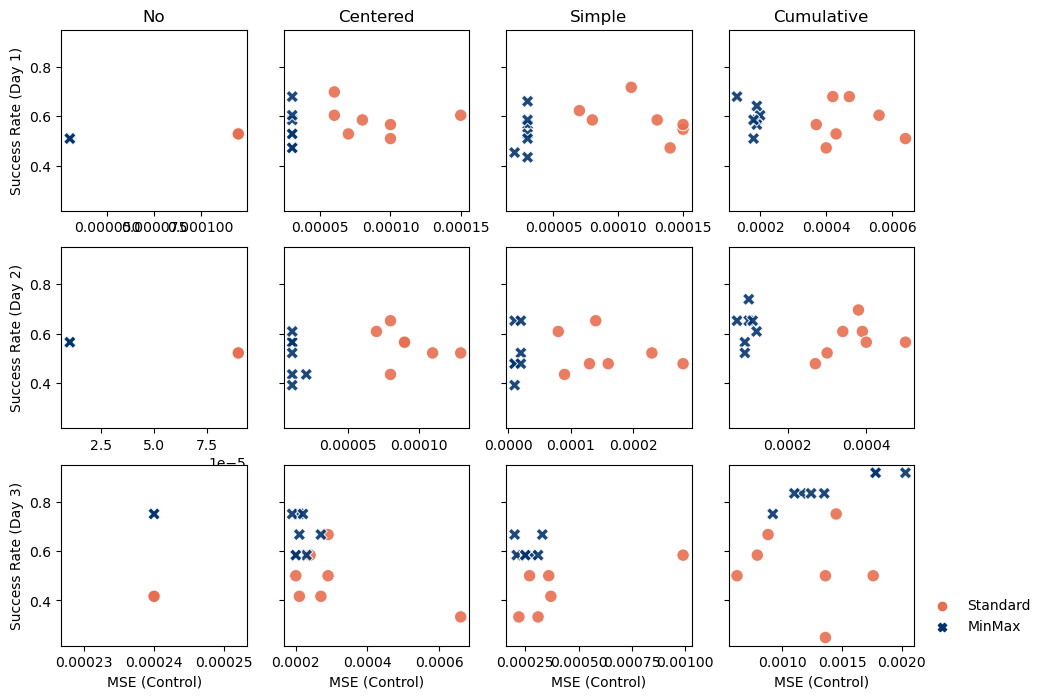

In [35]:

f, ax = plt.subplots(3, 4, figsize=(11, 8), sharey=True, sharex=False)
df_0 = df[df["Date"] == "April_8"]
df_1 = df[df["Date"] == "April_9"]
df_2 = df[df["Date"] == "April_10"]

df_0 = df[df["Date"] == "Day 1"]
df_1 = df[df["Date"] == "Day 2"]
df_2 = df[df["Date"] == "Day 3"]
for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[0, i],
                        data=df_0[df_0["Moving Average Type"] == condition], 
                        hue="Scaler Type", y="Success Rate", x="MSE Control", style = "Scaler Type", legend=i==4)
    g.set_title(str(condition).title())
    g.set_xlabel(" ")
    if i%2==0: g.set_ylabel("Success Rate (Day 1)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[1, i],
                        data=df_1[df_1["Moving Average Type"] == condition], 
                        hue="Scaler Type", y="Success Rate", x="MSE Control", style = "Scaler Type", legend=i==4)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel(" ")
    if i%2==0: g.set_ylabel("Success Rate (Day 2)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[2, i],
                        data=df_2[df_2["Moving Average Type"] == condition], 
                        hue="Scaler Type", y="Success Rate", x="MSE Control", style = "Scaler Type", legend=i==3)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel("MSE (Control)")
    if i%2==0: g.set_ylabel("Success Rate (Day 3)")

plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
plt.savefig("plots\mse_control_by_scaler_type_and_ma_types.pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


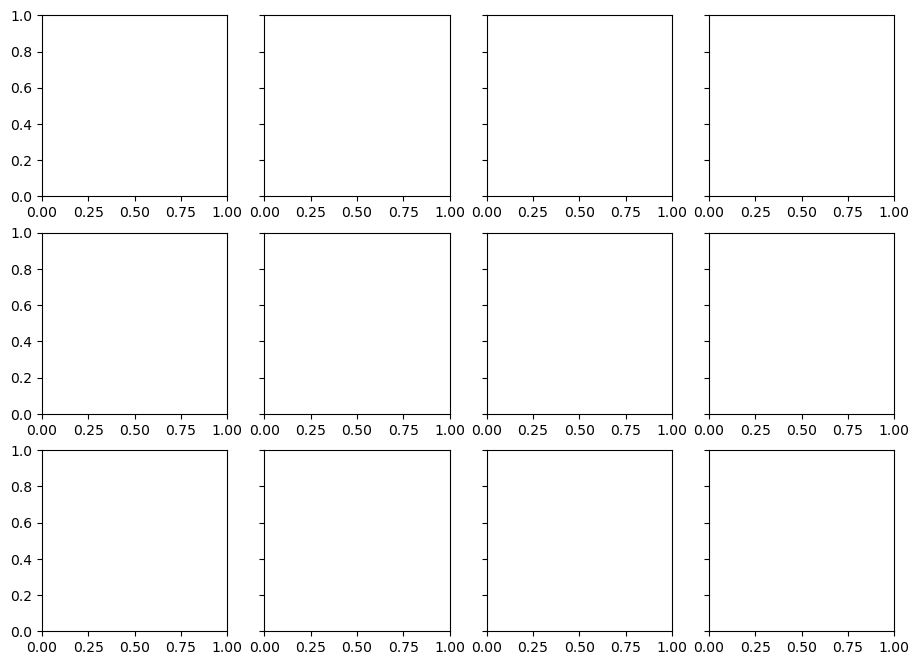

In [ ]:
# f, ax = plt.subplots(3, 4, figsize=(11, 8), sharey=True, sharex=False)
# df_0 = df[df["Date"] == "April_8"]
# df_1 = df[df["Date"] == "April_9"]
# df_2 = df[df["Date"] == "April_10"]
# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[0, i],
#                         data=df_0[df_0["Moving Average Type"] == condition], 
#                         hue="Scaler Type", y="Success Rate", x="MSE Experiment", style = "Scaler Type", legend=i==4)
#     g.set_title(str(condition).title())
#     g.set_xlabel(" ")
#     if i%2==0: g.set_ylabel("Success Rate (April 8)")

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #print(i,eps)
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[1, i],
#                         data=df_1[df_1["Moving Average Type"] == condition], 
#                         hue="Scaler Type", y="Success Rate", x="MSE Experiment", style = "Scaler Type", legend=i==3)
#     #g.set_title("MA Direction = "+str(condition))
#     g.set_xlabel(" ")
#     if i%2==0: g.set_ylabel("Success Rate (April 9)")

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #print(i,eps)
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= scaler_type_cdict, alpha=0.9, s=80, ax=ax[2, i],
#                         data=df_2[df_2["Moving Average Type"] == condition], 
#                         hue="Scaler Type", y="Success Rate", x="MSE Experiment", style = "Scaler Type", legend=i==3)
#     #g.set_title("MA Direction = "+str(condition))
#     g.set_xlabel("MSE (Experiment)")
#     if i%2==0: g.set_ylabel("Success Rate (April 10)")

# plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)
# #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
# plt.savefig("plots\mse_exp_by_scaler_type_and_ma_types.pdf", bbox_inches="tight")

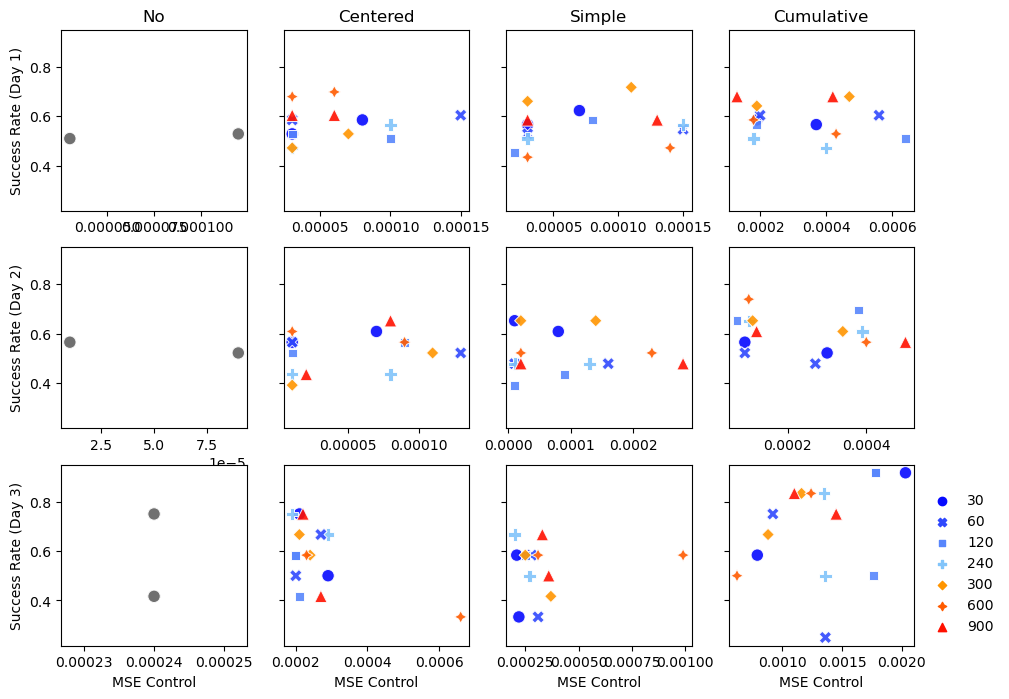

In [37]:
cmap_b = colors.LinearSegmentedColormap.from_list("", ["lightskyblue","blue"])
cmap_r = colors.LinearSegmentedColormap.from_list("", ["orange","red"])
ma_num_cdict = {0: "#707070",30: cmap_b(0.95),
                60: cmap_b(0.65),120: cmap_b(0.35),
                240: cmap_b(0.05),300: cmap_r(0.1),
                600: cmap_r(0.45),900:  cmap_r(0.9),
                "_0": "#707070"}

#df = df_per[df_per["Scaler Type"] == "Standard"]

df_0 = df[df["Date"] == "April_8"]
df_1 = df[df["Date"] == "April_9"]
df_2 = df[df["Date"] == "April_10"]

df_0 = df[df["Date"] == "Day 1"]
df_1 = df[df["Date"] == "Day 2"]
df_2 = df[df["Date"] == "Day 3"]

f, ax = plt.subplots(3, 4, figsize=(11, 8), sharey=True, sharex=False)

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[0, i],
                        data=df_0[df_0["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==4)
    g.set_title(str(condition).title())
    g.set_xlabel(" ")
    if i%2==0: g.set_ylabel("Success Rate (Day 1)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[1, i],
                        data=df_1[df_1["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==4)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel("")
    if i%2==0: g.set_ylabel("Success Rate (Day 2)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[2, i],
                        data=df_2[df_2["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==3)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel("MSE Control")
    if i%2==0: g.set_ylabel("Success Rate (Day 3)")

plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
plt.savefig("plots\mse_control_by_ma_w_size.pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


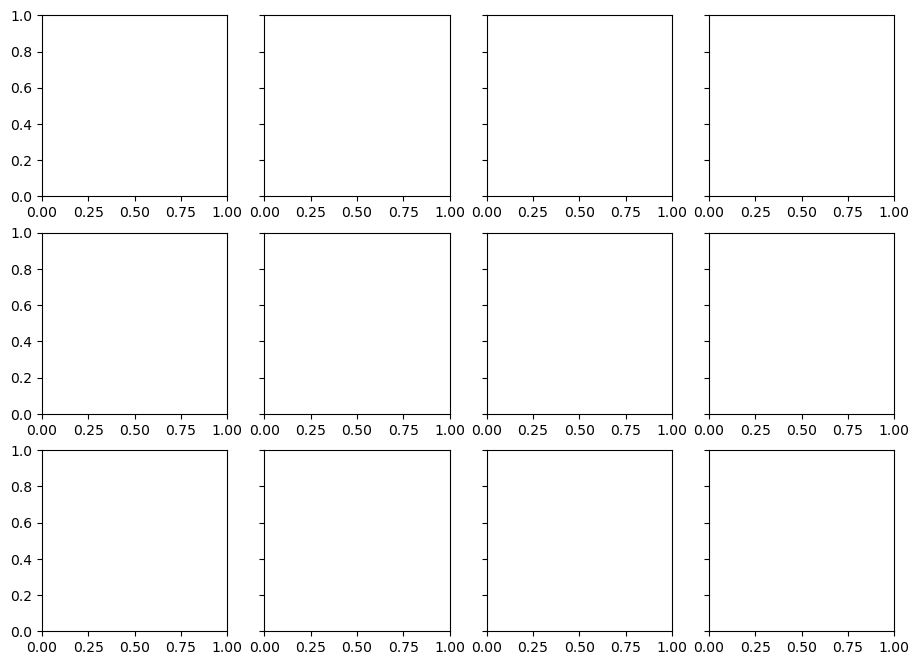

In [ ]:
# ###########################################################

# df_0 = df[df["Date"] == "April_8"]
# df_1 = df[df["Date"] == "April_9"]
# df_2 = df[df["Date"] == "April_10"]

# f, ax = plt.subplots(3, 4, figsize=(11, 8), sharey=True, sharex=False)

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[0, i],
#                         data=df_0[df_0["Moving Average Type"] == condition], 
#                         hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==4)
#     g.set_title(str(condition).title())
#     g.set_xlabel(" ")
#     if i%2==0: g.set_ylabel("Success Rate (April 8)")

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #print(i,eps)
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[1, i],
#                         data=df_1[df_1["Moving Average Type"] == condition], 
#                         hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==4)
#     #g.set_title("MA Direction = "+str(condition))
#     g.set_xlabel("")
#     if i%2==0: g.set_ylabel("Success Rate (April 9)")

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #print(i,eps)
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[2, i],
#                         data=df_2[df_2["Moving Average Type"] == condition], 
#                         hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==3)
#     #g.set_title("MA Direction = "+str(condition))
#     g.set_xlabel("MSE Control")
#     if i%2==0: g.set_ylabel("Success Rate (April 10)")

# plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)
# #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
# #plt.savefig("plots\mse_control_by_ma_w_size_and_scaler_types.pdf", bbox_inches="tight")

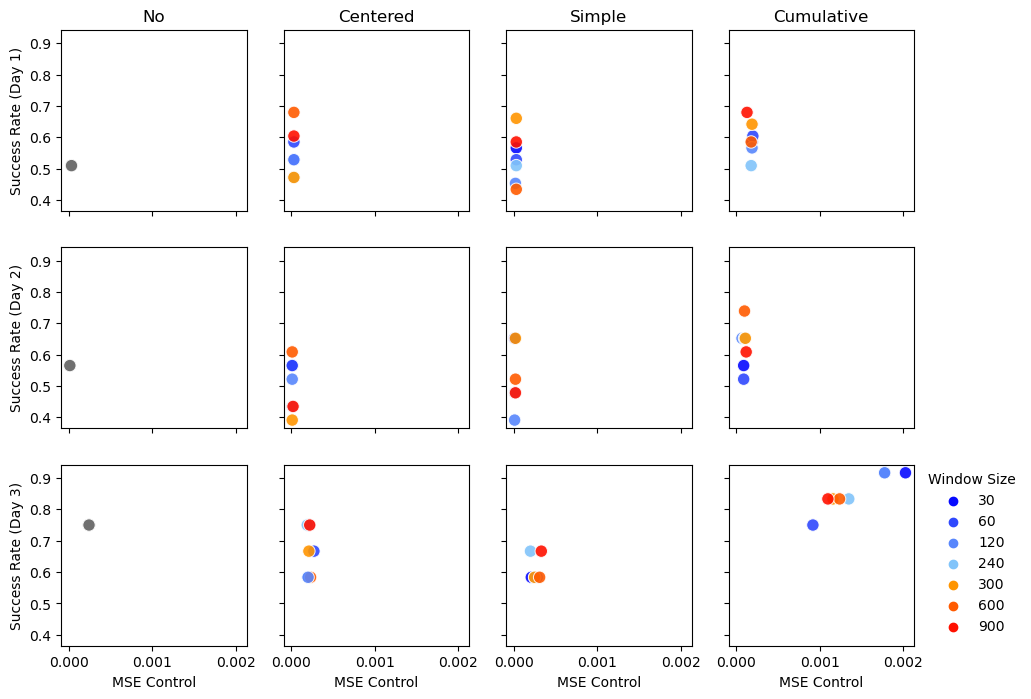

In [39]:
df_minmax = df[df["Scaler Type"] == "MinMax"]
#df_minmax = df
df_0 = df_minmax[df_minmax["Date"] == "Day 1"]
df_1= df_minmax[df_minmax["Date"] == "Day 2"]
df_2= df_minmax[df_minmax["Date"] == "Day 3"]


f, ax = plt.subplots(3, 4, figsize=(11, 8), sharey=True, sharex=True)
#ax.get_xaxis().set_major_formatter(FormatStrFormatter('%.3f'))

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[0, i],
                        data=df_0[df_0["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", legend=i==4)
    g.set_title(str(condition).title())
    g.set_xlabel(" ")
    if i%2==0: g.set_ylabel("Success Rate (Day 1)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[1, i],
                        data=df_1[df_1["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", legend=i==4)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel("")
    if i%2==0: g.set_ylabel("Success Rate (Day 2)")

for i,condition in enumerate(df_0["Moving Average Type"].unique()):
    #print(i,eps)
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[2, i],
                        data=df_2[df_2["Moving Average Type"] == condition], 
                        hue="Moving Average Window Size", y="Success Rate", x="MSE Control", legend=i==3)
    #g.set_title("MA Direction = "+str(condition))
    g.set_xlabel("MSE Control")
    if i%2==0: g.set_ylabel("Success Rate (Day 3)")

plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1, title = "Window Size")
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
#plt.savefig("plots\mse_control_by_ma_w_size_with_minmax.pdf", bbox_inches="tight")
plt.savefig("plots\mse_control_by_ma_w_size_with_minmax.png", bbox_inches="tight")

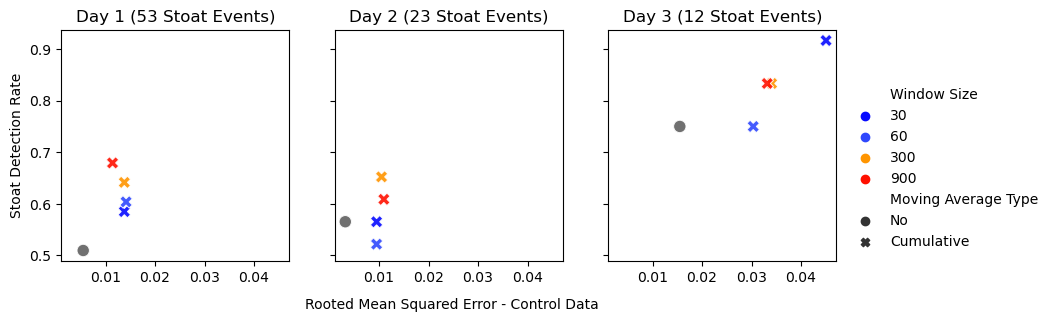

In [40]:
options = ["Cumulative", 'No']
options2 = [0, 30, 60, 300, 900]
df_c_no= df_minmax[df_minmax["Moving Average Type"].isin(options)]
df_c_no= df_c_no[df_c_no["Moving Average Window Size"].isin(options2)]
df_c_no = df_c_no.rename(columns={"Moving Average Window Size": "Window Size", "Moving Average Type": "Moving Average Type"}, errors="raise")
df_c_no['RMSE Control']=np.sqrt(df_c_no['MSE Control'])
df_c_no.loc[df_c_no["Window Size"] == 0, "Window Size"] = '_0'

f, ax = plt.subplots(1, 3, figsize=(10, 3), sharey=True, sharex=True)
#ax.get_xaxis().set_major_formatter(FormatStrFormatter('%.3f'))

for i,condition in enumerate(df_c_no["Date"].unique()):
    #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
                        #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
                        #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
    g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[i],
                        data=df_c_no[df_c_no["Date"] == condition], 
                        hue="Window Size", y="Success Rate", x="RMSE Control", style = "Moving Average Type", legend=i==2)
    if i == 0:
        g.set_title(str(condition).title() + (" (53 Stoat Events)"))
    elif i == 1:
        g.set_title(str(condition).title() + (" (23 Stoat Events)"))
    elif i == 2:
        g.set_title(str(condition).title() + (" (12 Stoat Events)"))
    g.set_xlabel(" ")
    g.set_ylabel("Stoat Detection Rate")
#f.supxlabel('MSE Control')
f.text(0.515, -0.05, 'Rooted Mean Squared Error - Control Data', ha='center')
plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)#, title = "Window Size")
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
#plt.savefig("plots\mse_control_by_ma_w_size_with_minmax.pdf", bbox_inches="tight")
plt.savefig("plots\mse_control_by_ma_w_size_with_minmax_c_no.png", bbox_inches="tight")

In [41]:
# cmap_b = colors.LinearSegmentedColormap.from_list("", ["lightskyblue","blue"])
# cmap_r = colors.LinearSegmentedColormap.from_list("", ["orange","red"])
# ma_num_cdict = {0: "#707070",30: cmap_b(0.95),
#                 60: cmap_b(0.65),120: cmap_b(0.35),
#                 240: cmap_b(0.05),300: cmap_r(0.1),
#                 600: cmap_r(0.45),900:  cmap_r(0.9),}

# df_minmax = df[df["Scaler Type"] == "MinMax"]
# df_0 = df_minmax[df_minmax["Date"] == "April_9"]
# df_1= df_minmax[df_minmax["Date"] == "April_10"]

# f, ax = plt.subplots(2, 4, figsize=(9, 5), sharey=True, sharex=False)

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[0, i],
#                         data=df_0[df_0["Moving Average Type"] == condition], 
#                         hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==4)
#     g.set_title(str(condition).title())
#     g.set_xlabel(" ")
#     if i%2==0: g.set_ylabel("Success Rate (April 9)")

# for i,condition in enumerate(df_0["Moving Average Type"].unique()):
#     #print(i,eps)
#     #g = sns.scatterplot(palette=cdict_t, hue_order=order_t[3:], alpha=0.9, s=80, ax=ax[i//2, i%2],
#                         #data=df_t_attacks_anns_grouped.reset_index()[df_t_attacks_anns_grouped.reset_index().Epsilon == eps], 
#                         #hue="Attack Name", y="Attacked AE", x="Sum Per", style="Attack Name", legend=i==3)
#     g = sns.scatterplot(palette= ma_num_cdict, alpha=0.9, s=80, ax=ax[1, i],
#                         data=df_1[df_1["Moving Average Type"] == condition], 
#                         hue="Moving Average Window Size", y="Success Rate", x="MSE Control", style = "Moving Average Window Size", legend=i==3)
#     #g.set_title("MA Direction = "+str(condition))
#     g.set_xlabel("MSE Control")
#     if i%2==0: g.set_ylabel("Success Rate (April 10)")
# plt.legend(loc="lower left", bbox_to_anchor=(1.01, 0), frameon=False, ncol=1)
# #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
# plt.savefig("plots\mse_control_by_ma_w_size_with_minmax.pdf", bbox_inches="tight")